In [7]:
import numpy as np 
from sklearn.utils import shuffle 
from sklearn.datasets._samples_generator import make_blobs

X_train, Y_train = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=6, random_state=11)

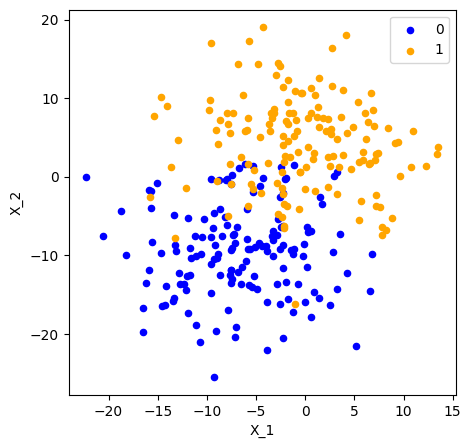

In [8]:
from matplotlib import pyplot as plt 
from matplotlib.pyplot import figure 
from pandas import DataFrame

df = DataFrame(dict( x = X_train[:, 0], y=X_train[:, 1], label=Y_train ))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots(figsize=(5,5))
grouped = df.groupby('label')

for key, group in grouped: 
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

In [15]:
dict( x = X_train[:, 0], y=X_train[:, 1], label=Y_train )

{'x': array([0.59987983, 0.22476575, 0.42582798, 0.60646637, 0.35477231,
        0.82957651, 0.55773053, 0.29883186, 0.69335399, 0.31063825,
        0.44205243, 0.57713703, 0.56609269, 0.85660376, 0.77537888,
        0.56111526, 0.55348965, 0.28867437, 0.68789902, 0.49307707,
        0.99704928, 0.52339697, 0.32528595, 0.57193512, 0.81427533,
        0.36023964, 0.42140537, 0.6687857 , 0.16135801, 0.96335567,
        0.58709931, 0.822312  , 0.79515713, 0.81224249, 0.63948215,
        0.75055902, 0.63815525, 0.29499835, 0.83291239, 0.73850984,
        0.55574335, 0.83950192, 0.4959454 , 0.69623881, 0.61174913,
        0.52988215, 0.18434657, 0.71344075, 0.40370154, 0.4116453 ,
        0.58987738, 0.51880811, 0.26251178, 0.57383502, 0.69342328,
        0.83968469, 0.73002915, 0.25252703, 0.42742143, 0.63109018,
        0.54475674, 0.50212512, 0.70249062, 0.57176902, 0.41224818,
        0.40037448, 0.77955669, 0.21532136, 0.80770848, 0.63875536,
        0.62695381, 0.75727417, 0.72135043,

<h2>Feature scaling</h2>

In [9]:
def normalize(X):
    x1_min = min(X_train[:,0])
    x1_max = max(X_train[:,0])
    
    f = lambda x: (x - x1_min)/(x1_max - x1_min)
    X[:,0] = f(X[:,0])

    x2_min = min(X_train[:,1])
    x2_max = max(X_train[:,1])
    
    f = lambda x: (x - x2_min)/(x2_max - x2_min)
    X[:,1] = f(X[:,1])
    
    return X

In [10]:
X = normalize(X_train)
print(X[0:5])

[[0.59987983 0.70438379]
 [0.22476575 0.2065585 ]
 [0.42582798 0.14400726]
 [0.60646637 0.58589566]
 [0.35477231 0.56762558]]


<h2>Heart of KNN</h2>

In [11]:
def find_neighbors(k, X_tr, new_point):
    neighbor_arr = []
    for i in range(len(X_tr)): 
        dist = np.sqrt( sum( np.square(X_tr[i] - new_point) ) )
        neighbor_arr.append( [i, dist] )
    neighbor_arr = sorted(neighbor_arr, key= lambda x : x[1])
    
    return neighbor_arr[0:k]

<h2>Classification with KNN</h2>

In [12]:
from collections import Counter
def classifier(neighbor_arr):
    class_arr = [Y_train[i[0]] for i in neighbor_arr]
    return Counter(class_arr).most_common(1)[0][0]

In [13]:
new_points = np.array([[-10, -10],
                      [0, 10],
                      [-15, 10],
                      [5, -2]])


In [14]:
k = 4
knn = find_neighbors(k, X, new_points[1])
classifier(knn)

1